In [1]:
import numpy as np
from sklearn import linear_model,datasets,metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from pandas import DataFrame
%matplotlib inline

In [9]:
def model(source,target):
    #1.pca  parameter selection
    df=pd.read_csv(source)
    df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1,inplace=True)
    #df.drop(['Unnamed: 0'], axis=1,inplace=True)
    #X = df.iloc[:,0:-23]#只用于pos
    X = df.iloc[:,0:-1]
    print(X.head())
    y = df.ix[:,-1]
    #Fitting the PCA algorithm with our Data
    pca = PCA().fit(X)
    #Plotting the Cumulative Summation of the Explained Variance
    plt.figure()
    ratio=pca.explained_variance_ratio_
    plt.plot([i for i in range(X.shape[1])],
             [np.sum(ratio[:i+1]) for i in range(X.shape[1])])
    #plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xticks(np.arange(X.shape[1],step=5000))
    plt.yticks(np.arange(0,1.01,0.05))
    plt.xlabel('Number of Components')
    plt.ylabel('Variance (%)') #for each component
    #plt.title('Pulsar Dataset Explained Variance')
    plt.grid()
    plt.show()
    
    #2.show pricipal components
    pca=PCA(n_components=0.98)
    pca.fit(X,y)
    ratio=pca.explained_variance_ratio_
    print("pca.components_",pca.components_.shape)
    #print("pca.components_",pca.components_)
    print("pca_var_ratio",pca.explained_variance_ratio_.shape)
    n_pcs= pca.components_.shape[0]
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
    initial_feature_names = X.columns
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
    #dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
    dic = {'{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
    df_n = pd.DataFrame(sorted(dic.items()))
    print(df_n)
    df_n.columns=['rank','feature']
    df_n['rank']=df_n['rank'].astype('int')
    print(df_n.columns)
    
    df_n = df_n.sort_values(by="rank",ascending=True)
    print(df_n[0:30])
    
    #3.pca reduce dimension
    #pca=PCA(n_components=  )
    reduced_X = pca.fit_transform(X)
    print(X.shape[1])
    print(reduced_X.shape[1])
    train_X,test_X,train_y,test_y=train_test_split(reduced_X,y,test_size=0.25,random_state=0)
    print(train_y.dtypes)

    #4.model fit and result
    LR = ElasticNet(random_state=0)
    ### 对训练数据进行拟合训练
    LR.fit(train_X, train_y)

    ### 输出参数,分别是截距（intercept_）和权重参数(coef_）
    print('LR.intercept:\n',LR.intercept_)
    print('LR.coef:\n',LR.coef_)

    ### 根据测试数据计算预测值y_predict
    train_y_predict=LR.predict(train_X).astype('int64')
    test_y_predict=LR.predict(test_X).astype('int64')

    ###保存预测值和实际值
    result=DataFrame({"test_y":test_y.tolist(),"test_y_predict":test_y_predict.tolist()},columns=["test_y","test_y_predict"])
    result.to_csv(target)

    R2=cross_val_score(LR, train_X,train_y, cv=10, scoring='r2').mean()
    MSE=cross_val_score(LR, train_X,train_y, cv=10, scoring='neg_mean_squared_error').mean()
    RMSE=np.sqrt(MSE)
    print(R2)
    print(MSE)
    print(RMSE)

    ### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
    print('train R^2:\n',LR.score(train_X,train_y))
    ### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
    print ("train MSE:",metrics.mean_squared_error(train_y,train_y_predict))
    ### RMSE为均方根误差
    print('train RMSE:',np.sqrt(metrics.mean_squared_error(train_y,train_y_predict)))

    ### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
    print('test R^2:\n',LR.score(test_X,test_y))
    ### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
    print ("test MSE:",metrics.mean_squared_error(test_y,test_y_predict))
    ### RMSE为均方根误差
    print('test RMSE:',np.sqrt(metrics.mean_squared_error(test_y,test_y_predict)))


    print('test_y_predict:\n',test_y_predict[0:5])    ### 输出预测值前5行
    print('test_y:\n',test_y[0:5])          ### 输出测试值前5行
    plt.scatter(test_y,test_y_predict,c='b',alpha=0.5,marker='*')   
    plt.xlabel('test_y')
    plt.ylabel('test_y_predict')
    plt.plot([test_y.min(),test_y.max()],[test_y.min(),test_y.max()],'k--',lw=4)   ### 画出y=x这条线
    plt.show()

    

   )  #  ,  FW  IN  JJS  RBS  PRP$  VBN  ``  ...  JJR  WP$  PDT  EX  DT  TO  \
0  1  0  1   0   1    1    1     1    1   0  ...    1    0    0   1   1   1   
1  0  0  1   0   1    1    1     1    1   1  ...    0    0    0   1   1   1   
2  0  0  1   0   1    1    0     1    1   0  ...    1    0    0   1   1   1   
3  1  0  1   1   1    1    0     1    1   1  ...    1    0    0   1   1   1   
4  0  0  1   0   1    0    1     1    1   1  ...    1    0    0   1   1   1   

   LS  NNPS  MD  WDT  
0   0     0   1    1  
1   0     0   1    1  
2   0     0   1    1  
3   0     1   1    1  
4   0     0   1    1  

[5 rows x 45 columns]


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


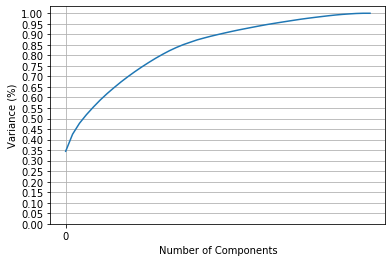

pca.components_ (37, 45)
pca_var_ratio (37,)
     0     1
0    1   WDT
1   10    WP
2   11    WP
3   12   JJR
4   13   WDT
5   14     $
6   15    FW
7   16     :
8   17   WRB
9   18    CD
10  19   NNP
11   2     (
12  20    ``
13  21    MD
14  22  PRP$
15  23   VBZ
16  24  PRP$
17  25     ,
18  26   VBD
19  27   VBD
20  28    MD
21  29   VBG
22   3    ''
23  30   NNP
24  31    CC
25  32   PDT
26  33    RB
27  34     #
28  35    DT
29  36    JJ
30  37    JJ
31   4    EX
32   5   RBS
33   6   RBR
34   7   RBR
35   8  NNPS
36   9   POS
Index(['rank', 'feature'], dtype='object')
    rank feature
0      1     WDT
11     2       (
22     3      ''
31     4      EX
32     5     RBS
33     6     RBR
34     7     RBR
35     8    NNPS
36     9     POS
1     10      WP
2     11      WP
3     12     JJR
4     13     WDT
5     14       $
6     15      FW
7     16       :
8     17     WRB
9     18      CD
10    19     NNP
12    20      ``
13    21      MD
14    22    PRP$
15    23     VBZ
16    24  

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in sqrt


-0.0005661145300630777
-0.3962891843885258
nan
train R^2:
 0.0
train MSE: 0.6393350239504085
train RMSE: 0.7995842819555725
test R^2:
 -4.672693211227319e-05
test MSE: 0.6314454775993238
test RMSE: 0.7946354369138868
test_y_predict:
 [2 2 2 2 2]
test_y:
 5069     3
17262    2
4522     3
10617    3
9561     3
Name: AGE, dtype: int64


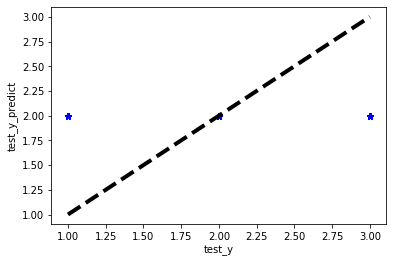

In [10]:
model("pan13-author-profiling-training-corpus-2013-01-09/social_pos_matrix.csv","social_pos_result.csv")

   (  EX  CD  FW  NNS  NNP  POS  WP  VBD  RB  ...  JJS  ,  WP$  :  NNPS  SYM  \
0  1   1   1   1    1    1    1   1    1   1  ...    1  1    1  1     1    0   
1  1   1   1   1    1    1    1   1    1   1  ...    1  1    1  1     1    0   
2  1   1   1   1    1    1    1   1    1   1  ...    1  1    1  1     1    0   
3  1   1   1   1    1    1    1   1    1   1  ...    1  1    1  1     1    1   
4  0   1   1   1    1    1    1   1    1   1  ...    1  1    1  1     1    0   

   $  ``  PRP$  )  
0  0   1     1  1  
1  1   1     1  1  
2  1   1     1  1  
3  1   1     1  1  
4  0   1     1  0  

[5 rows x 44 columns]


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


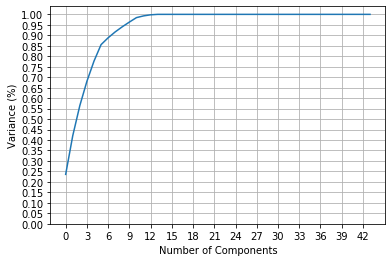

pca.components_ (12, 44)
pca_var_ratio (12,)
     0     1
0    1    ``
1   10    FW
2   11   POS
3   12   WP$
4    2     (
5    3   RBS
6    4     $
7    5    UH
8    6   PDT
9    7  NNPS
10   8     #
11   9   SYM
Index(['rank', 'feature'], dtype='object')
    rank feature
0      1      ``
4      2       (
5      3     RBS
6      4       $
7      5      UH
8      6     PDT
9      7    NNPS
10     8       #
11     9     SYM
1     10      FW
2     11     POS
44
12
int64
LR.intercept:
 1888.8249563640752
LR.coef:
 [-0.          0.26532394  0.          0.60091677  0.          0.
  0.         -0.         -0.         -0.          0.          0.        ]
-0.033178567608105745
-353.4942895759176
nan
train R^2:
 0.003940306944530625
train MSE: 350.6521739130435
train RMSE: 18.725708902817097
test R^2:
 -0.0029434766642983945
test MSE: 270.2826086956522
test RMSE: 16.440273984810965
test_y_predict:
 [1888 1888 1889 1889 1888]
test_y:
 85     1873
490    1874
96     1870
107    1890
263    1906
N

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in sqrt


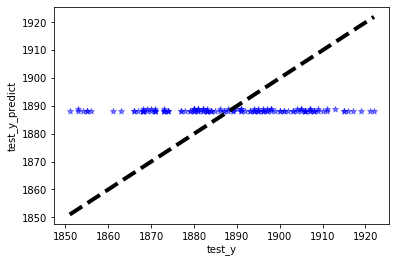

In [71]:
model("DCLSA/la_dataset_split/tem/all_pos_matrix.csv","all_pos_result.csv")

   unhandicapped.VBD  threequarters.NNS  hay-riggings.NNS  instruct.VBD  \
0                0.0                0.0               0.0      0.000000   
1                0.0                0.0               0.0      0.006066   
2                0.0                0.0               0.0      0.000000   
3                0.0                0.0               0.0      0.012961   
4                0.0                0.0               0.0      0.000000   

   sealegs.JJ  parent-honoring.NN  Riparia.NNP  dntnken.NN  germain.NN  \
0         0.0                 0.0          0.0         0.0         0.0   
1         0.0                 0.0          0.0         0.0         0.0   
2         0.0                 0.0          0.0         0.0         0.0   
3         0.0                 0.0          0.0         0.0         0.0   
4         0.0                 0.0          0.0         0.0         0.0   

   Camp..NNP  ...   12   13       14   15   16   17   18   19   20        21  
0        0.0  ...  0.0  0

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


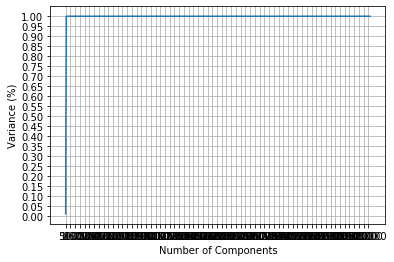

pca.components_ (536, 321747)
pca_var_ratio (536,)
       0           1
0      1    show.VBP
1     10     man..NN
2    100    Ever.NNP
3    101  possess.JJ
4    102   anyone.NN
..   ...         ...
531   95    tread.NN
532   96     mood.NN
533   97   sorry.VBP
534   98  sparkle.NN
535   99  slight.VBD

[536 rows x 2 columns]
Index(['rank', 'feature'], dtype='object')
     rank             feature
0       1            show.VBP
111     2         allusion.NN
222     3                   1
333     4        cigarette.NN
444     5           coolly.RB
492     6                   7
503     7                  21
514     8                   7
525     9                   9
1      10             man..NN
12     11  Worcestershire.NNP
321747
536
int64
LR.intercept:
 1888.8299670547322
LR.coef:
 [-0.          0.          0.         -0.47142165  0.         -0.
  0.          0.         -0.         -0.          0.         -0.
  0.         -0.         -0.          0.          0.          0.
 -0.         -

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in sqrt


-0.03106690604192951
-352.86099174901517
nan
train R^2:
 0.001975346410148071
train MSE: 352.42512077294685
train RMSE: 18.772989127279303
test R^2:
 -0.0023136402106449516
test MSE: 270.54347826086956
test RMSE: 16.44820592833363
test_y_predict:
 [1888 1888 1888 1888 1888]
test_y:
 85     1873
490    1874
96     1870
107    1890
263    1906
Name: YEAR, dtype: int64


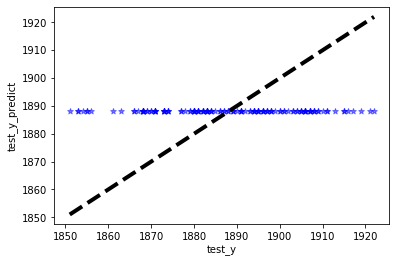

In [75]:
model("DCLSA/la_dataset_split/tem/ti_all_lexical_matrix1.csv","all_lexical_result.csv")

   unhandicapped.VBD  threequarters.NNS  hay-riggings.NNS  instruct.VBD  \
0                  0                  0                 0             0   
1                  0                  0                 0             1   
2                  0                  0                 0             0   
3                  0                  0                 0             1   
4                  0                  0                 0             0   

   sealegs.JJ  parent-honoring.NN  Riparia.NNP  dntnken.NN  germain.NN  \
0           0                   0            0           0           0   
1           0                   0            0           0           0   
2           0                   0            0           0           0   
3           0                   0            0           0           0   
4           0                   0            0           0           0   

   Camp..NNP  ...   12   13   14   15   16   17   18   19   20   21  
0          0  ...  0.0  0.0  0.0  

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


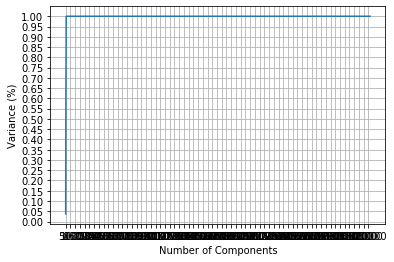

pca.components_ (521, 321747)
pca_var_ratio (521,)
       0                1
0      1         lead.VBD
1     10           n't.RB
2    100           icy.NN
3    101        dress.VBN
4    102         ocean.JJ
..   ...              ...
516   95        deeply.RB
517   96        jacket.NN
518   97      believe.VBP
519   98  handkerchief.JJ
520   99      conquer.VBD

[521 rows x 2 columns]
Index(['rank', 'feature'], dtype='object')
     rank          feature
0       1         lead.VBD
111     2      absently.RB
222     3          Mrs.NNP
333     4   practically.RB
444     5        coolly.RB
477     6      vacation.NN
488     7          XIX.NNP
499     8         Love.NNP
510     9        obtain.VB
1      10           n't.RB
12     11   undoubtedly.RB
23     12               20
34     13    adventure.NNS
45     14         favor.NN
56     15       praise.VBD
67     16         first.JJ
78     17      produce.VBG
89     18        clean.VBD
100    19         more..NN
112    20           Ha.NNP
123

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in sqrt


0.7516199836791531
-84.39748335897124
nan
train R^2:
 0.9524732560931558
train MSE: 17.195652173913043
train RMSE: 4.146764060555296
test R^2:
 0.6475450756247795
test MSE: 94.76086956521739
test RMSE: 9.734519483015964
test_y_predict:
 [1873 1881 1872 1882 1904]
test_y:
 85     1873
490    1874
96     1870
107    1890
263    1906
Name: YEAR, dtype: int64


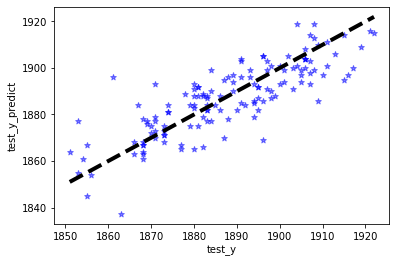

In [80]:
model("DCLSA/la_dataset_split/tem/all_lexical_matrix.csv","all_lexical_result2.csv")

   clown  bequeath  juturna  'surpassing  overclean  novo  1st.  \
0      0         0        0            0          0     0     0   
1      0         1        0            0          0     0     0   
2      1         0        0            0          0     0     0   
3      1         0        0            0          0     0     0   
4      0         0        0            0          0     0     0   

   side-flirtation  saxons  cigar-smoking  ...  12.1  13.1  14.1  15.1  16.1  \
0                0       0              0  ...   0.0   0.0   0.0   0.0   0.0   
1                0       0              0  ...   0.0   0.0   1.0   0.0   0.0   
2                0       0              0  ...   0.0   0.0   0.0   0.0   0.0   
3                0       0              0  ...   0.0   0.0   0.0   0.0   0.0   
4                0       0              0  ...   0.0   0.0   0.0   0.0   0.0   

   17.1  18.1  19.1  20.1  21.1  
0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0 

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


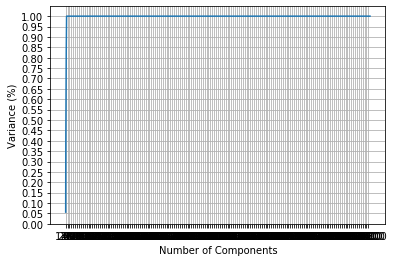

In [51]:

#1.pca  parameter selection
df=pd.read_csv("DCLSA/la_dataset_split/tem/all_lemma_matrix.csv")
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1,inplace=True)
#X = df.iloc[:,0:-23]
X = df.iloc[:,0:-1]
print(X.head())
y = df.ix[:,-1]
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
ratio=pca.explained_variance_ratio_
plt.plot([i for i in range(X.shape[1])],
         [np.sum(ratio[:i+1]) for i in range(X.shape[1])])
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(X.shape[1],step=1200))
plt.yticks(np.arange(0,1.01,0.05))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
#plt.title('Pulsar Dataset Explained Variance')
plt.grid()
plt.show()


In [52]:
#2.show pricipal components
pca=PCA(n_components=0.95)
pca.fit(X,y)
ratio=pca.explained_variance_ratio_
print("pca.components_",pca.components_.shape)
#print("pca.components_",pca.components_)
print("pca_var_ratio",pca.explained_variance_ratio_.shape)
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = X.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
#dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
dic = {'{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
df_n = pd.DataFrame(sorted(dic.items()))
print(df_n)
df_n.columns=['rank','feature']
df_n['rank']=df_n['rank'].astype('int')
print(df_n.columns)

pca.components_ (481, 191828)
pca_var_ratio (481,)
       0         1
0      1      king
1     10        ca
2    100      papa
3    101      peak
4    102    banner
..   ...       ...
476   95      papa
477   96  religion
478   97   good-by
479   98   seventh
480   99      lake

[481 rows x 2 columns]
Index(['rank', 'feature'], dtype='object')


In [53]:
df_n = df_n.sort_values(by="rank",ascending=True)
print(df_n[0:30])


     rank     feature
0       1        king
111     2  good-night
222     3     captain
333     4        aunt
426     5          ca
437     6       hotel
448     7        love
459     8           s
470     9         tea
1      10          ca
12     11         war
23     12        aunt
34     13   meanwhile
45     14      avenue
56     15          ca
67     16       yacht
78     17      nothin
89     18           j
100    19      prince
112    20   meanwhile
123    21          de
134    22        pray
145    23      temple
156    24     good-by
167    25   doubtless
178    26   evidently
189    27       villa
200    28          wo
211    29          le
223    30        gasp


191828
481
int64
LR.intercept:
 1888.75824989527
LR.coef:
 [ 9.83982529e-02 -4.79192844e-01  8.04352519e-01 -1.26188268e+00
  4.52854185e-01 -1.06381654e+00 -3.24680514e-01  5.09804694e-01
  2.07622420e-01  4.43896850e-01 -5.28664470e-01 -0.00000000e+00
 -3.21940735e-01  6.85241344e-01 -0.00000000e+00  5.52545970e-01
  5.86764786e-01 -9.19354816e-01  3.62990672e-01 -9.21579923e-02
  9.58257860e-02 -0.00000000e+00  4.07598964e-01  4.00938533e-01
  0.00000000e+00 -2.12492147e-01 -3.19065017e-02  0.00000000e+00
  7.68238342e-03  2.30878721e-02 -8.36809229e-03 -4.56773722e-02
  3.55719516e-01  2.35440492e-01  0.00000000e+00 -2.98017349e-01
 -3.13742460e-01  7.23538512e-02 -8.36316798e-02 -0.00000000e+00
  2.08818945e-01  2.62030898e-02 -1.56637649e-01  2.42406848e-01
 -6.64642787e-02  2.39596962e-01 -0.00000000e+00  0.00000000e+00
  1.10029162e-01 -0.00000000e+00 -0.00000000e+00 -7.31645601e-02
  4.91563373e-01 -5.09204154e-02 -0.00000000e+00 -1.31149007e-01
  4.33964355e-02 -0.00000000e+0

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


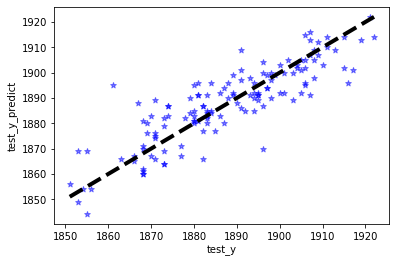

In [54]:

#3.pca reduce dimension
#pca=PCA(n_components=  )
reduced_X = pca.fit_transform(X)
print(X.shape[1])
print(reduced_X.shape[1])
train_X,test_X,train_y,test_y=train_test_split(reduced_X,y,test_size=0.25,random_state=0)
print(train_y.dtypes)

#4.model fit and result
LR = ElasticNet(random_state=0)
### 对训练数据进行拟合训练
LR.fit(train_X, train_y)

### 输出参数,分别是截距（intercept_）和权重参数(coef_）
print('LR.intercept:\n',LR.intercept_)
print('LR.coef:\n',LR.coef_)

### 根据测试数据计算预测值y_predict
train_y_predict=LR.predict(train_X).astype('int64')
test_y_predict=LR.predict(test_X).astype('int64')

###保存预测值和实际值
result=DataFrame({"test_y":test_y.tolist(),"test_y_predict":test_y_predict.tolist()},columns=["test_y","test_y_predict"])
result.to_csv("all_lemma_result.csv")

R2=cross_val_score(LR, train_X,train_y, cv=10, scoring='r2').mean()
MSE=cross_val_score(LR, train_X,train_y, cv=10, scoring='neg_mean_squared_error').mean()
RMSE=np.sqrt(MSE)
print(R2)
print(MSE)
print(RMSE)

### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
print('train R^2:\n',LR.score(train_X,train_y))
### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
print ("train MSE:",metrics.mean_squared_error(train_y,train_y_predict))
### RMSE为均方根误差
print('train RMSE:',np.sqrt(metrics.mean_squared_error(train_y,train_y_predict)))

### 计算确定系数R^2,取值范[0,1],值越大,说明模拟的拟合度越好，对模型的解释能力越强
print('test R^2:\n',LR.score(test_X,test_y))
### MSE为均方误差，用测试数据来验证，MSE为预测数据和测试数据误差平方和的均值
print ("test MSE:",metrics.mean_squared_error(test_y,test_y_predict))
### RMSE为均方根误差
print('test RMSE:',np.sqrt(metrics.mean_squared_error(test_y,test_y_predict)))


print('test_y_predict:\n',test_y_predict[0:5])    ### 输出预测值前5行
print('test_y:\n',test_y[0:5])          ### 输出测试值前5行
plt.scatter(test_y,test_y_predict,c='b',alpha=0.5,marker='*')   
plt.xlabel('test_y')
plt.ylabel('test_y_predict')
plt.plot([test_y.min(),test_y.max()],[test_y.min(),test_y.max()],'k--',lw=4)   ### 画出y=x这条线
plt.show()
